In [12]:

import pandas as pd
raw_data=pd.read_csv('C:\\Users\\cakir\\Desktop\\MS-DSBA\\DSBA-6162 - Knowledge Discovery and Data Mining\\group4project\\dsba6156-finalgroupproject-python\\data\\raw\\mediaprediction.csv',encoding = "ISO-8859-1").query("sales_country == 'USA'").drop(columns="sales_country")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

raw_data.columns


Index(['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'promotion_name', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost'], dtype='object')

# Data Visualization

In [11]:
store_features = [
    "store_type",
    "store_city",
    "store_state",
    "store_sqft",
    "grocery_sqft",
    "frozen_sqft",
    "meat_sqft",
    "coffee_bar",
    "video_store",
    "salad_bar",
    "prepared_food",
    "florist",
]

product_features = [
    "food_category",
    "food_department",
    "food_family",
    "brand_name",
    "SRP",
    "gross_weight",
    "net_weight",
    "recyclable_package",
    "low_fat",
    "units_per_case",
]

customer_features = [
    "marital_status",
    "gender",
    "total_children",
    "education",
    "member_card",
    "occupation",
    "houseowner",
    "avg_cars_at home(approx)",
    "avg. yearly_income",
    "num_children_at_home",
    # Note: duplcicate row, delete
    # "avg_cars_at home(approx).1",
]

promotion_features = ["promotion_name", "media_type"]

store_and_product_features = [
    "store_sales(in millions)",
    "store_cost(in millions)",
    "unit_sales(in millions)",
]

In [13]:
store_data = raw_data.loc[:, store_features].drop_duplicates().reset_index(drop=True)
promotion_data = raw_data.loc[:, promotion_features].drop_duplicates().reset_index(drop=True)
product_data = raw_data.loc[:, product_features].drop_duplicates().reset_index(drop=True)
customer_data = raw_data.loc[:, customer_features].drop_duplicates().reset_index(drop=True)


In [15]:
import numpy as np
intermedite_data = (
    raw_data
    # duplicate column in dataset
    .drop(columns=["avg_cars_at home(approx).1"])

    # pull out category specifc data and replace it with an ID
    .merge(
        (
            store_data.assign(store_id=lambda df: np.arange(len(df))).set_index(
                store_features
            )
        ),
        on=store_features,
    )
    .drop(columns=store_features)
    .merge(
        (
            customer_data.assign(customer_id=lambda df: np.arange(len(df))).set_index(
                customer_features
            )
        ),
        on=customer_features,
    )
    .drop(columns=customer_features)
    .merge(
        (
            product_data.assign(product_id=lambda df: np.arange(len(df))).set_index(
                product_features
            )
        ),
        on=product_features,
    )
    .drop(columns=product_features)
    .merge(
        (
            promotion_data.assign(promotion_id=lambda df: np.arange(len(df))).set_index(
                promotion_features
            )
        ),
        on=promotion_features,
    )
    .drop(columns=promotion_features)
)

sales_data = intermedite_data.drop(columns=["cost", "customer_id"]).drop_duplicates()

cost_data = intermedite_data.drop(
    columns=[
        "store_sales(in millions)",
        "store_cost(in millions)",
        "unit_sales(in millions)",
    ]
)

In [ ]:
intermedite_data = (
    raw_data
    # duplicate column in dataset
    .drop(columns=["avg_cars_at home(approx).1"])

    # pull out category specifc data and replace it with an ID
    .merge(
        (
            store_data.assign(store_id=lambda df: np.arange(len(df))).set_index(
                store_features
            )
        ),
        on=store_features,
    )
    .drop(columns=store_features)
    .merge(
        (
            customer_data.assign(customer_id=lambda df: np.arange(len(df))).set_index(
                customer_features
            )
        ),
        on=customer_features,
    )
    .drop(columns=customer_features)
    .merge(
        (
            product_data.assign(product_id=lambda df: np.arange(len(df))).set_index(
                product_features
            )
        ),
        on=product_features,
    )
    .drop(columns=product_features)
    .merge(
        (
            promotion_data.assign(promotion_id=lambda df: np.arange(len(df))).set_index(
                promotion_features
            )
        ),
        on=promotion_features,
    )
    .drop(columns=promotion_features)
)

sales_data = intermedite_data.drop(columns=["cost", "customer_id"]).drop_duplicates()

cost_data = intermedite_data.drop(
    columns=[
        "store_sales(in millions)",
        "store_cost(in millions)",
        "unit_sales(in millions)",
    ]
)

<AxesSubplot:xlabel='clc', ylabel='n_transactions'>

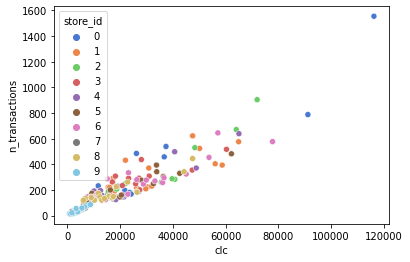

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def drop_col_level(df, level=0):
    df.columns = df.columns.droplevel(level=level)

    return df

foo = (
    cost_data
    .merge(promotion_data, left_on="promotion_id", right_index=True)
    .groupby(["store_id","promotion_name",])
    .agg(
        {
            "cost": [
                ("clc", "sum"),
                ("n_transactions", "count"),
                ("cost_per_customer", "median"),
                ("spread", lambda x: x.max() - x.min()),
                ("levels", "nunique"),
                ],
        }
    )
    .sort_index()
    .transform(drop_col_level)
    .reset_index()
)
foo.head()
sns.scatterplot(data=foo, x="clc", y="n_transactions", hue="store_id", palette="muted")

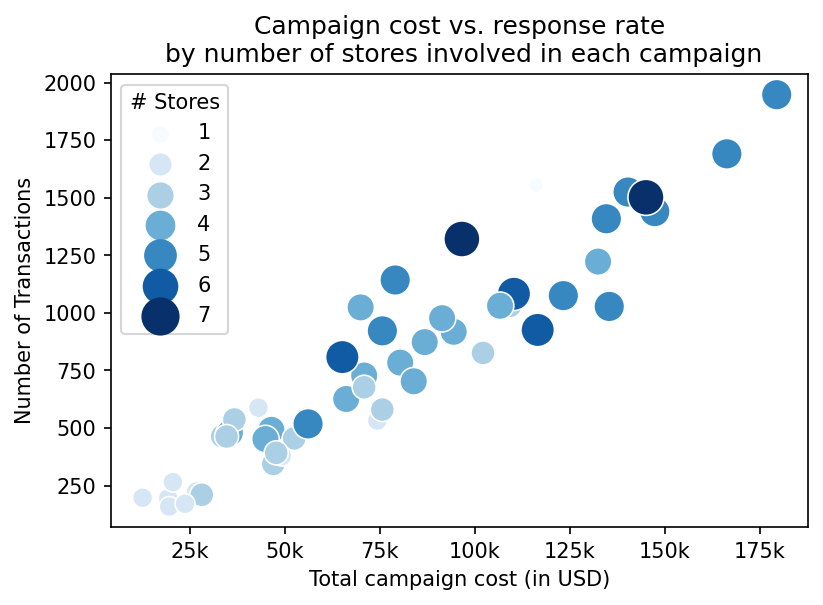

In [32]:
fig, ax = plt.subplots(dpi=150)  # 150 dpi for web presentation (eg slides)
sns.scatterplot(
    data=(
        cost_data
        .merge(promotion_data, left_on="promotion_id", right_index=True)
        .groupby(["promotion_name"])
        .agg(
            {
                "cost": [("clc", "sum"), ("n_transactions", "count")],
                "store_id": [("n_stores", "nunique")],
            }
        )
        .sort_index()
        .transform(drop_col_level)
    ),
    y="n_transactions",
    x="clc",
    size="n_stores",
    sizes=(50, 300),
    hue="n_stores",
    palette="Blues",
    ax=ax,
)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: str(int(x / 1000)) + "k")
)
ax.set_ylabel("Number of Transactions")
ax.set_xlabel("Total campaign cost (in USD)")
ax.set_title("Campaign cost vs. response rate\n by number of stores involved in each campaign")
ax.legend(title="# Stores")

There are a couple of interesting insights here:

1. There is a fairly linear relationship between cost and number of transactions. (Most campaigns are equally effective.)
1. There is a non-linear relationship between the number of stores involved in a campaign and number of transactions.
1. Some campaigns are clearly more economically efficient than others in attracting customers and there is some heteroscedacity in the data.
1. What does this mean for our prediction of campaign cost? 
> The more money was spent the more transactions are made in the store. More interestingly there doesn't seem to be diminishing returns on this. In other words, twice the money spent means twice the amount of responses should be obtained as per the data.